# Diabetes Prediction
In this project, we will predict whether a person is suffering from Diabetes or not using Pytorch ANN.

In [15]:
# Lets import torch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Lets chck version
torch.__version__

'1.5.1+cpu'

In [4]:
# Importing the dataset
import pandas as pd
df = pd.read_csv("diabetes.csv")

In [5]:
# Lets see the first five rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Checking null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no null values in the data set. Lets use seaborn to visualize the data set. Firstly, we need to convert the target feature into strings as it is required in seaborn.

In [7]:
# Lets convert the target into strings
import numpy as np
df["Outcome"] = np.where(df["Outcome"] == 1, "Diabetic", "Non-diabetic")

In [8]:
# Lets check the data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non-diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non-diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


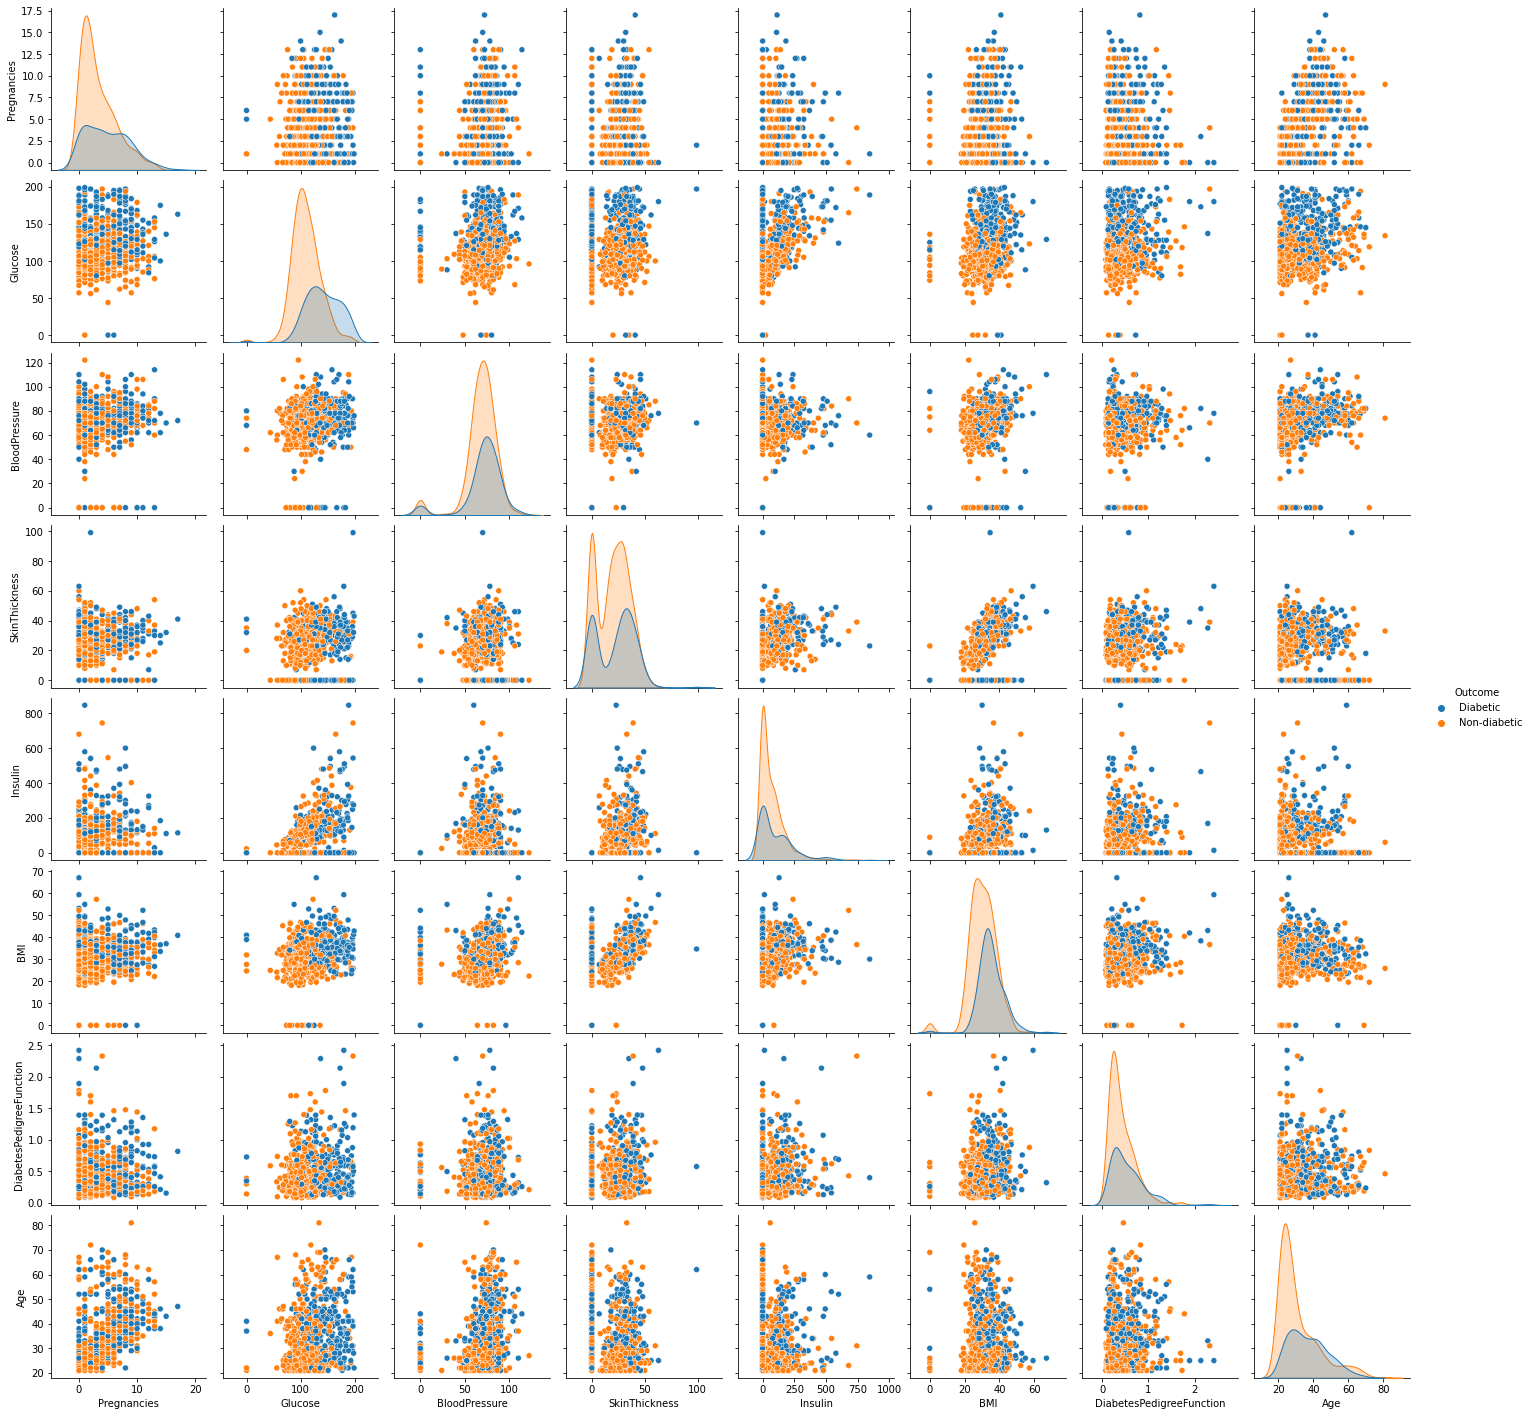

In [9]:
# Lets use seaborn to create a pair plot to get an idea of the data
import seaborn as sns
sns.pairplot(df, hue = "Outcome")

In [10]:
# Lets convert the target again back to 0 and 1
df["Outcome"] = np.where(df["Outcome"] == "Diabetic", 1, 0)

In [11]:
# Lets check our data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
# Independent and dependent featueres --> converting into numpy arrays
X = df.drop("Outcome", axis = 1).values
y = df["Outcome"].values

In [14]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
# Creating tensors
# We have convert our independent features into float tensors and our dependent features not into float tensors, so we can convert into long tensors

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test) 

In [29]:
# Creating the ANN model using Pytorch

class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [30]:
# Instantiate the ANN model
torch.manual_seed(20)
model=ANN_Model()

In [31]:
# Lets see the model parameters
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [32]:
# Backward propagation
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [33]:
# Model training
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 3.45721173286438
Epoch number: 11 and the loss : 0.8019213080406189
Epoch number: 21 and the loss : 0.6090323328971863
Epoch number: 31 and the loss : 0.5917770862579346
Epoch number: 41 and the loss : 0.567970871925354
Epoch number: 51 and the loss : 0.552903950214386
Epoch number: 61 and the loss : 0.5410096645355225
Epoch number: 71 and the loss : 0.5310390591621399
Epoch number: 81 and the loss : 0.522036075592041
Epoch number: 91 and the loss : 0.5135970115661621
Epoch number: 101 and the loss : 0.5061255097389221
Epoch number: 111 and the loss : 0.49834105372428894
Epoch number: 121 and the loss : 0.4960549771785736
Epoch number: 131 and the loss : 0.48286378383636475
Epoch number: 141 and the loss : 0.4756038784980774
Epoch number: 151 and the loss : 0.48334550857543945
Epoch number: 161 and the loss : 0.4882747530937195
Epoch number: 171 and the loss : 0.4705841839313507
Epoch number: 181 and the loss : 0.47636622190475464
Epoch number: 191 and th

In [38]:
# Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
1
0
1
1
0
1
0
0
1
0
1
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
1
0
1
1
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0


In [39]:
# Validation
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[90, 17],
       [15, 32]], dtype=int64)

Text(69.0, 0.5, 'Predicted Values')

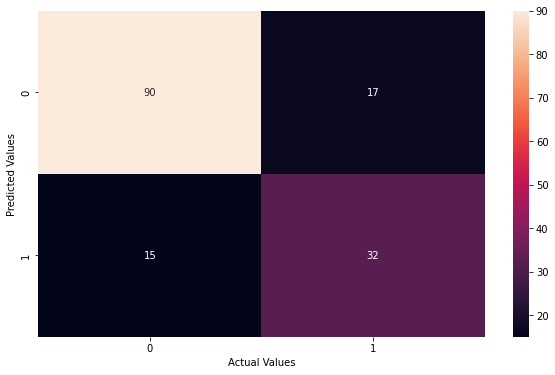

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [41]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7922077922077922

In [42]:
# Save the model
torch.save(model,'diabetes.pt')

C:\Users\SWARNAVA\anaconda3\envs\pytorch\lib\site-packages\torch\serialization.py:402: UserWarning: Couldn't retrieve source code for container of type ANN_Model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [43]:
# Save And Load the model
model=torch.load('diabetes.pt')

In [44]:
# Model details
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [46]:
# New Data
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [47]:
new_data=torch.tensor(lst1)

In [48]:
# Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([0.9786, 1.4289])
1
